# Simulate a Brain Circuit

In [2]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [3]:
a  = .02
b  = .2
c  = -50
d  = 2

v = -65
u = b*v

In [4]:
simulation_time = 1000
memvolt = np.zeros(simulation_time)
Iall = np.zeros(simulation_time)

In [5]:
simulation_time = 1000
memvolt = np.zeros(simulation_time)
Iall = np.zeros(simulation_time)

for t in range(simulation_time):

  I = -2 if (t>200) & (t<400) else 7
  #I = 6*np.random.rand()

  if v >= 30:
    v = c
    u += d

  v += .04*v**2 + 5*v + 140 - u + I
  u += a*(b*v-u)

  memvolt[t] = v
  Iall[t] = I

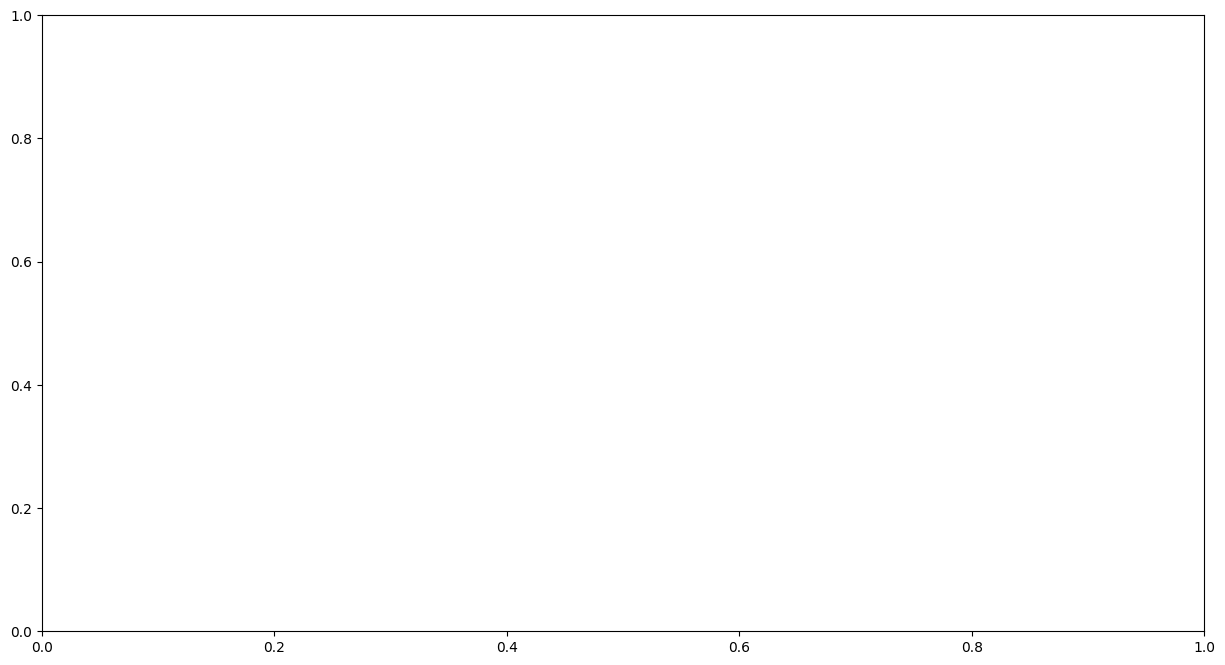

In [6]:
fig,ax = plt.subplots(1,figsize=(15,8))

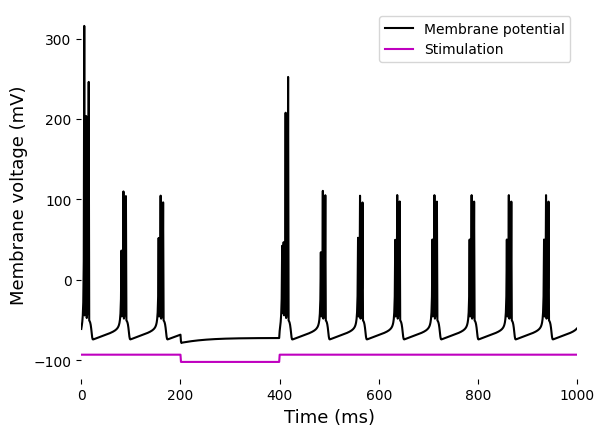

In [7]:
plt.plot(memvolt,'k',label='Membrane potential')
plt.plot(Iall-100,'m',label='Stimulation')
plt.xlabel('Time (ms)',fontsize=13)
plt.ylabel('Membrane voltage (mV)',fontsize=13)
plt.box(False)
plt.xlim([0,simulation_time])
plt.legend(fontsize=10)
plt.show()

# Create a circuit of 1000 neurons

In [8]:
Ne = 800
Ni = 200
re = np.random.rand(Ne)
ri = np.random.rand(Ni)

a = np.hstack((.02*np.ones(Ne), .02+.08*ri))
b = np.hstack((.2*np.ones(Ne), .25-.05*ri))
c = np.hstack((-65+15*re**2, -65*np.ones(Ni)))
d = np.hstack((8-6*re**2, 2*np.ones(Ni)))

v = -65*np.ones(Ne+Ni)
u = b*v

In [9]:
S = np.hstack((.5*np.random.rand(Ne+Ni,Ne), -np.random.rand(Ne+Ni,Ni) ))

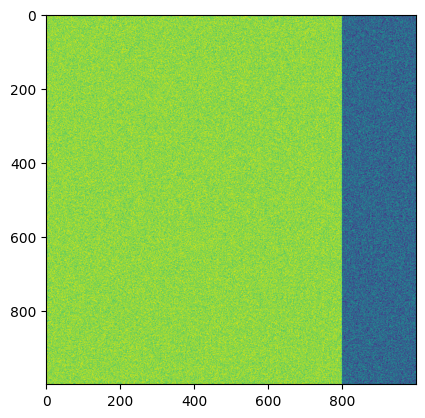

In [10]:
plt.imshow(S)

# Simulate the neural circuit

In [11]:
simulation_time = 5000
firings = np.array([[],[]])

for t in range(simulation_time):
  I = np.hstack((5*np.random.randn(Ne),2*np.random.randn(Ni)))
  # I = np.hstack((5*np.ones(Ne),2*np.ones(Ni)))
  
  fired   = np.where(v>=30)[0]
  tmp     = np.stack((np.tile(t,len(fired)),fired))
  firings = np.concatenate((firings,tmp),axis=1)

  v[fired] = c[fired]
  u[fired] = u[fired] + d[fired]

  I += np.sum(S[:,fired],axis=1)

  v += .04*v**2 + 5*v + 140 - u + I
  u += a*(b*v-u)

In [14]:
fired
tmp

array([[4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999,
        4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999],
       [ 161,  214,  225,  289,  309,  430,  431,  588,  598,  626,  695,
         711,  809,  835,  846,  861,  921,  944,  975,  982]],
      dtype=int64)

In [15]:
print(firings.shape)
firings

(2, 41993)


array([[   5.,    5.,    5., ..., 4999., 4999., 4999.],
       [ 129.,  134.,  578., ...,  944.,  975.,  982.]])

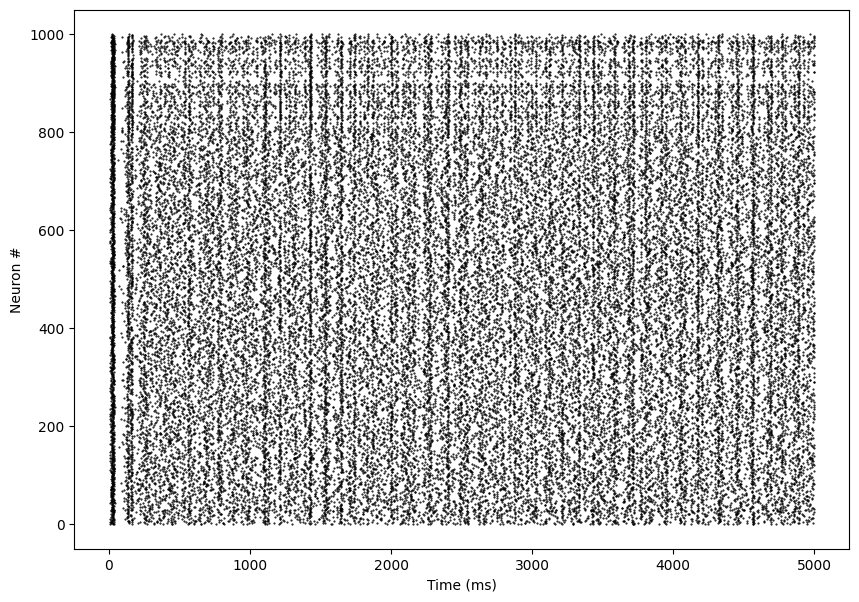

In [16]:
fig,ax = plt.subplots(1,figsize=(10,7))

plt.plot(firings[0,:],firings[1,:],'k.',markersize=1)
plt.xlabel('Time (ms)')
plt.ylabel('Neuron #')
# plt.xlim([1000,2000])
plt.show()

# Visualize population activity

In [17]:
popact = np.zeros(simulation_time)

for ti in range(simulation_time):
  popact[ti] = np.sum(firings[0,:]==ti) / (Ne+Ni)

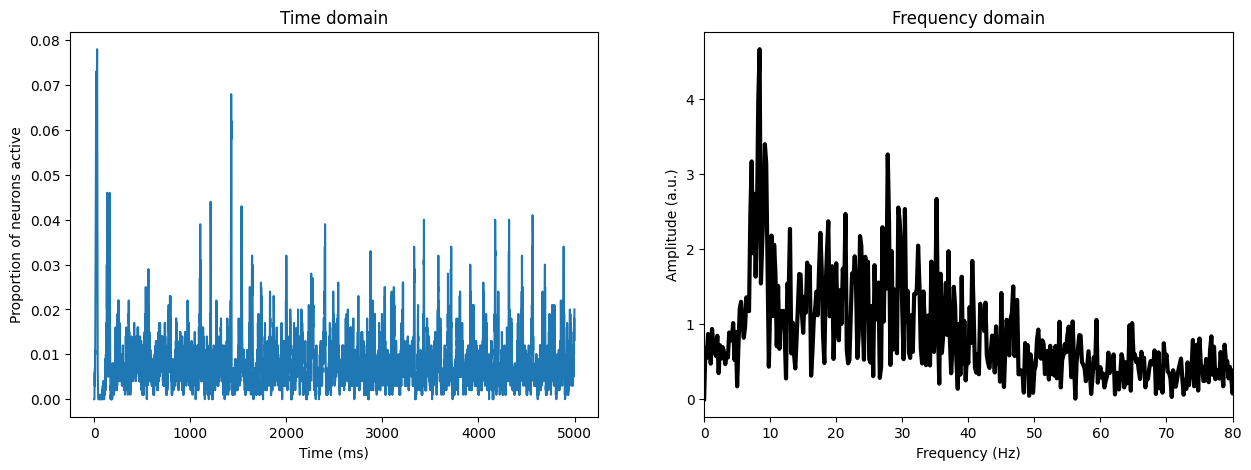

In [19]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(popact)
ax[0].set_xlabel('Time (ms)')
ax[0].set_ylabel('Proportion of neurons active')
ax[0].set_title('Time domain')
# ax[0].set_xlim([1000,1500])
# ax[0].set_ylim([0,.1])

popactX = np.abs(np.fft.fft(popact-np.mean(popact)))
hz = np.linspace(0,500,int(simulation_time/2+1))

ax[1].plot(hz,popactX[:len(hz)],'k',linewidth=3)
ax[1].set_xlim([0,80])
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude (a.u.)')
ax[1].set_title('Frequency domain')

plt.show()

# Experiment

In [20]:
def simCircuit(I):
  firings = np.array([[],[]])

  v = -65*np.ones(Ne+Ni)
  u = b*v

  for t in range(len(I)):

    stim = np.hstack((4*np.random.randn(Ne),1*np.random.randn(Ni))) + I[t]

    fired   = np.where(v>=30)[0]
    tmp     = np.stack((np.tile(t,len(fired)),fired))
    firings = np.concatenate((firings,tmp),axis=1)

    v[fired] = c[fired]
    u[fired] = u[fired] + d[fired]

    stim += np.sum(S[:,fired],axis=1)
 
    v += .04*v**2 + 5*v + 140 - u + stim
    u += a*(b*v-u)
  return firings

In [21]:
def plotPopActivity(firings):
  npnts = int(np.max(firings[0,:])+1) # +1 b/c starts at 0

  popact = np.zeros(npnts)
  for ti in range(npnts):
    popact[ti] = np.sum(firings[0,:]==ti) / (Ne+Ni)

  popactX = np.abs(np.fft.fft(popact-np.mean(popact)))
  hz = np.linspace(0,500,int(npnts/2+1))

  fig,ax = plt.subplots(1,3,figsize=(20,5))
  ax[0].plot(firings[0,:],firings[1,:],'k.',markersize=1)
  ax[0].plot(I*50+100,'m',linewidth=2)
  ax[0].set_xlabel('Time (ms)')
  ax[0].set_ylabel('Neuron #')
  ax[0].set_title('Population spiking')
  
  ax[1].plot(popact)
  ax[1].set_xlabel('Time (ms)')
  ax[1].set_ylabel('Proportion of neurons active')
  ax[1].set_title('Time domain')

  ax[2].plot(hz,popactX[:len(hz)],'k',linewidth=3)
  ax[2].set_xlim([0,80])
  ax[2].set_xlabel('Frequency (Hz)')
  ax[2].set_ylabel('Amplitude (a.u.)')
  ax[2].set_title('Frequency domain')
  plt.show()

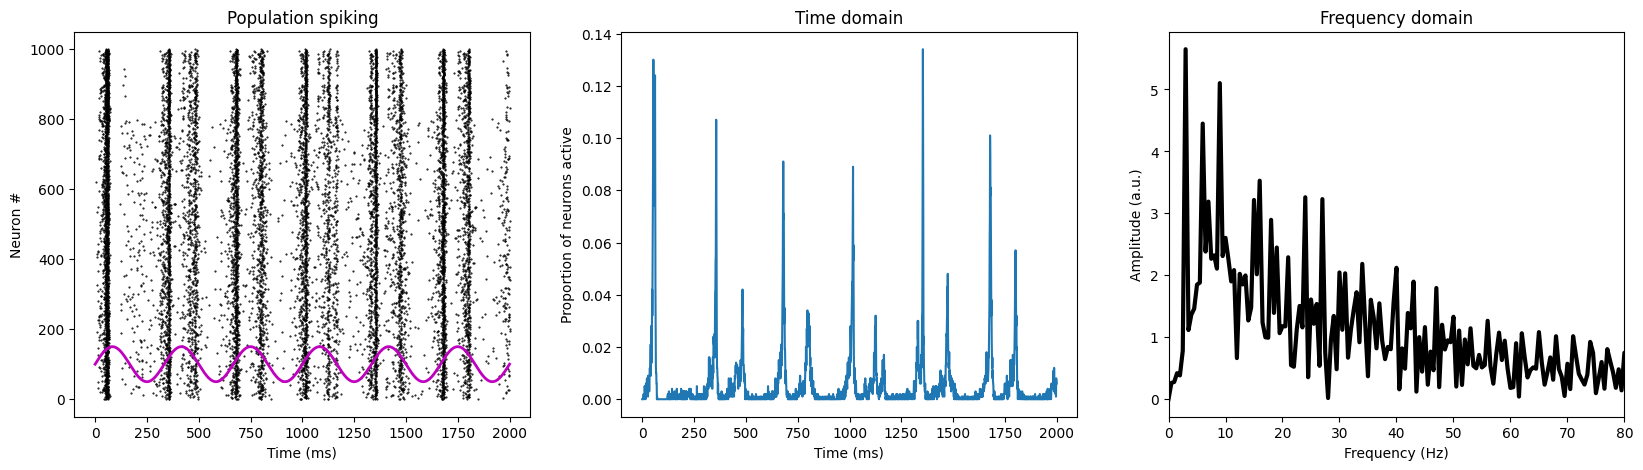

In [37]:
# option 1
I = np.ones(1234)
I[400:601] = -2

# option 2
I = (np.linspace(-2,2,3001))**2

# # option 3
I = np.sin(np.linspace(0,6*np.pi,2000)*2)

networkspikes = simCircuit(I)
plotPopActivity(networkspikes)

In [54]:
def plotPopActivityEI(firings):
  npnts = int(np.max(firings[0,:])+1)

  popact = np.zeros((2,npnts))
  for ti in range(npnts):
    popact[0,ti] = np.sum(firings[0,firings[1,:]<Ne]==ti) / Ne
    popact[1,ti] = np.sum(firings[0,firings[1,:]>=Ne]==ti) / Ni

  popactXE = np.abs(np.fft.fft(popact[0,:]-np.mean(popact[0,:])))
  popactXI = np.abs(np.fft.fft(popact[1,:]-np.mean(popact[1,:])))
  hz = np.linspace(0,500,int(npnts/2+1))

  fig,ax = plt.subplots(1,3,figsize=(15,5))
  ax[0].plot(firings[0,firings[1,:]>=Ne],firings[1,firings[1,:]>=Ne],'r.',markersize=1)
  ax[0].plot(firings[0,firings[1,:]<Ne],firings[1,firings[1,:]<Ne],'g.',markersize=1)
  ax[0].plot(I*50+100,'m',linewidth=2)
  ax[0].set_xlabel('Time (ms)')
  ax[0].set_ylabel('Neuron #')
  ax[0].set_title('Population spiking')
  
  ax[1].plot(popact[1,:],'r',label='I cells')
  ax[1].plot(popact[0,:],'g',label='E cells')
  ax[1].set_xlabel('Time (ms)')
  ax[1].set_ylabel('Proportion of neurons active')
  ax[1].legend()
  ax[1].set_title('Time domain')

  ax[2].plot(hz,popactXI[:len(hz)],'r',linewidth=2)
  ax[2].plot(hz,popactXE[:len(hz)],'g',linewidth=2)
  ax[2].set_xlim([0,80])
  ax[2].set_xlabel('Frequency (Hz)')
  ax[2].set_ylabel('Amplitude (a.u.)')
  ax[2].set_title('Frequency domain')
  plt.show()

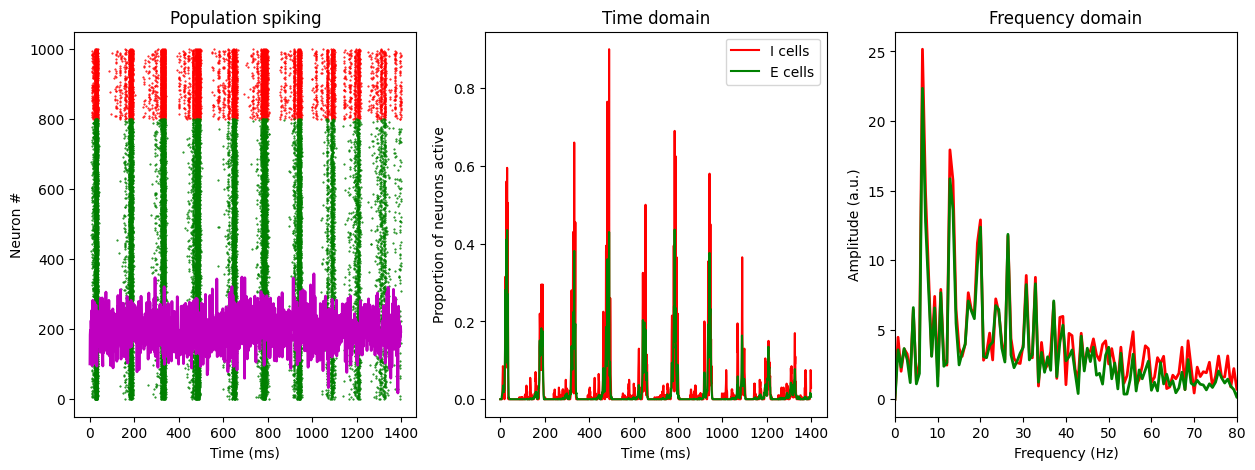

In [57]:
I = np.sin(np.linspace(0,6*np.pi,2435)*2)
I = np.random.randn(1400) + 2
networkspikes = simCircuit(I)
plotPopActivityEI(networkspikes)